In [6]:
import pandas as pd
import numpy as np

wine = 'C:\\Users\\rafiq\\OneDrive\\Desktop\\MEng Dissertation\\Dataset Methodology Initial Report\\Wine_Quality.csv'
data = pd.read_csv(wine)

print(data.head())
print(data.columns)
print("Row & Column: ", data.shape)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [7]:
# Convert categorical features to numerical type (Type column)

type_column_hot_encoded = pd.get_dummies(data["type"],drop_first=True)
print(type_column_hot_encoded.head())

   white
0      1
1      1
2      1
3      1
4      1


In [8]:
# Concatenate into the original data frame

data_1 = pd.concat([type_column_hot_encoded, data], axis=1)

# Drop the original type column
data_2 = data_1.drop("type", axis=1)
data_2

,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
# Check if there are any missing values
data_2.isnull().sum()

white                    0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
# Drop rows that have missing values 
data_2 = data_2.dropna(subset=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "pH", "sulphates"])

In [11]:
# See if all empty values have been removed 
print(data_2.isnull().sum())
print("Row & Column: ", data_1.shape)
# The rows have been reduced and no more missing data

white                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Row & Column:  (6497, 14)


In [12]:
data_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   white                 6463 non-null   uint8  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 662.7 KB


In [13]:
# Before proceeding, import necessary packages for Regression Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
# Lets first evaluate the performance of basic Linear Regression model without scaling

# Specify manipulated features, X
X = data_2.drop("quality", axis=1).values

# Specify target features,y
y = data_2["quality"].values

# Split the data into training set 70% and test set 30%
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all_unscaled = LinearRegression()
reg_all_unscaled.fit(X_train_unscaled, y_train_unscaled)
y_pred_all_unscaled = reg_all_unscaled.predict(X_test_unscaled)


In [15]:
# Assess performance of unscaled model using R-squared
print("R-squared score:", reg_all_unscaled.score(X_test_unscaled, y_test_unscaled))

# Assess performance of unscaled model using RMSE
print("RMSE score:", mean_squared_error(y_test_unscaled, y_pred_all_unscaled, squared=False))

R-squared score: 0.33875310675687875
RMSE score: 0.711609504594016


In [16]:
# Now let's try scaling and centering our data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# Change the shape of target features y 
y_train_unscaled = y_train_unscaled.reshape(-1, 1)
y_test_unscaled = y_test_unscaled.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_unscaled)
y_test_scaled = scaler.transform(y_test_unscaled)


reg_all_scaled = LinearRegression()
reg_all_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_all_scaled = reg_all_scaled.predict(X_test_scaled)

In [17]:
# Assess performance of scaled model using R-squared
print("R-squared score:", reg_all_scaled.score(X_test_scaled, y_test_unscaled))

# Assess performance of scaled model using RMSE
print("RMSE score:", mean_squared_error(y_test_unscaled, y_pred_all_scaled, squared=False))

# It appeared that the R-squared score becomes negative which suggests the Linear Regression model is unsuitable for this dataset
# The RMSE also increases which suggests overfitting

R-squared score: -43.565182799470406
RMSE score: 5.841949035726203


In [18]:
# To mitigate this, lets try deploying K-Fold Cross validation in terms of splitting our data

kf = KFold(n_splits = 20, shuffle = True, random_state = 42)
reg_cv = LinearRegression()
reg_cv_results = cross_val_score(reg_cv, X_train_scaled, y_train_scaled, cv=kf)

# Print the score
print(reg_cv_results)

# Print the mean and standard deviation
print("mean R-squared score and std:", np.mean(reg_cv_results), np.std(reg_cv_results))

# Print the confidence interval of upper limit say 97.5% and lower limit of 2.5%
print(np.quantile(reg_cv_results, [0.025, 0.975]))

[0.19851839 0.23460257 0.25757435 0.22034304 0.28797626 0.22437596
 0.2098682  0.34354877 0.33044101 0.32521876 0.2611593  0.30582765
 0.3380898  0.24598455 0.2532046  0.33367362 0.25027353 0.22156117
 0.28011077 0.27271722]
mean R-squared score and std: 0.2697534761475896 0.04520508563293315
[0.20390955 0.34095576]


In [19]:
# After deploying cross validation, the scores are low which suggests overfitting. 
# Lets apply regularisation to further mititgate this

# 1st: apply Ridge Regularisation

scores_ridge = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled, y_train_scaled)
  y_pred_ridge = ridge.predict(X_test_scaled)
  scores_ridge.append(ridge.score(X_test_scaled, y_test_scaled))
print(scores_ridge)

print("mean R-squared score Ridge Regression:", np.mean(scores_ridge))
print(np.quantile(scores_ridge, [0.025, 0.975]))

[0.33875177468947315, 0.33873960451302365, 0.33860261875919395, 0.33676859886280763, 0.3154665084829592]
mean R-squared score Ridge Regression: 0.33366582106149145
[0.31759672 0.33875056]


In [20]:
# 2nd: apply Lasso Regularisation

scores_lasso = []
for alpha in [0.1, 1.0, 10.0, 10.0, 1000]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_scaled, y_train_scaled)
  y_pred_lasso = lasso.predict(X_test_scaled)
  scores_lasso.append(lasso.score(X_test_scaled, y_test_scaled))
print(scores_lasso)

print("mean R-squared score Lasso Regression:", np.mean(scores_lasso))

print(np.quantile(scores_lasso, [0.025, 0.975]))

# The score when using Lasso regression is worse compared to using Ridge

[0.27363280278647295, -1.7145537790863585e-05, -1.7145537790863585e-05, -1.7145537790863585e-05, -1.7145537790863585e-05]
mean R-squared score Lasso Regression: 0.0547128441270619
[-1.71455378e-05  2.46267808e-01]


In [21]:
# 3rd: Check performance for KNN Regressor

# For now lets use K=30
knn_reg = KNeighborsRegressor(n_neighbors=30)
knn_reg.fit(X_train_scaled, y_train_scaled)
print(knn_reg.score(X_test_scaled, y_test_scaled))

0.3680538537081134


In [22]:
# Lets create a for loop to find the best K for this KNN regressor

# Create dictionaries
knn_reg_train_looped_accuracies = {}
knn_reg_test_looped_accuracies = {}
knn_neighbors = np.arange(1, 70)

# Create for loop to fill in the dictionaries

for neighbor in knn_neighbors:
   knn_reg_looped = KNeighborsRegressor(n_neighbors=neighbor)
   knn_reg_looped.fit(X_train_scaled, y_train_scaled)
   knn_reg_train_looped_accuracies[neighbor] = knn_reg_looped.score(X_train_scaled, y_train_scaled)
   knn_reg_test_looped_accuracies[neighbor] = knn_reg_looped.score(X_test_scaled, y_test_scaled)

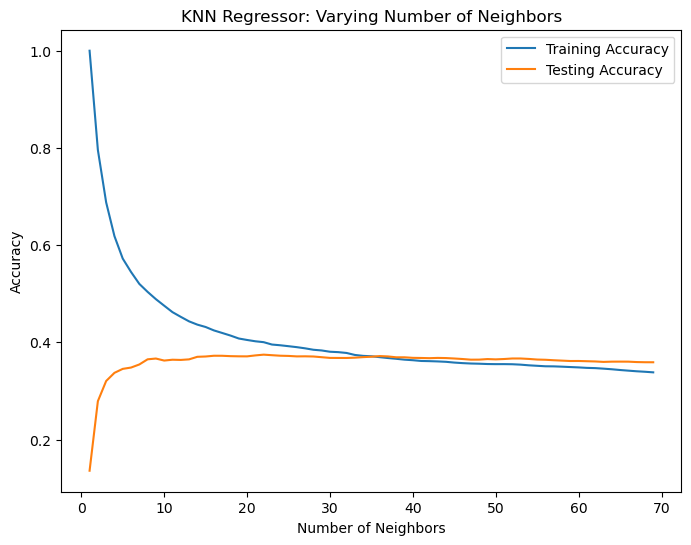

In [23]:
# Plot the accuracies against the varying number of neighbours

plt.figure(figsize = (8, 6))
plt.title("KNN Regressor: Varying Number of Neighbors")
plt.plot(knn_neighbors, knn_reg_train_looped_accuracies.values(), label="Training Accuracy")
plt.plot(knn_neighbors, knn_reg_test_looped_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [24]:
# From the basic comparisons made, it can be seen that using KNN Regressor (0.368) and Ridge Regression (0.33) and 
# Linear Regression K-Fold CV (0.27) are the top 3 models in terms of scoring, but not the best

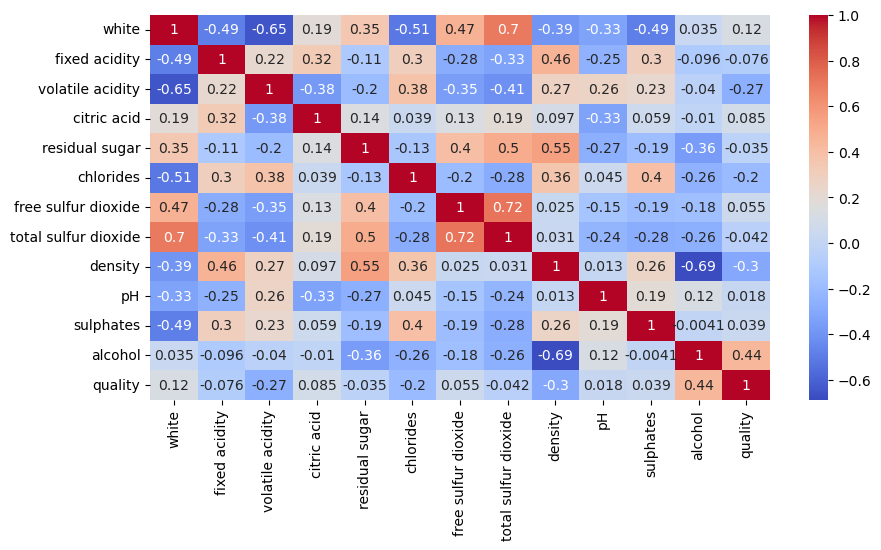

In [32]:
# Let's do feature selection and engineering to further reduce the dimensionality of the dataset

import seaborn as sns

# 1st: Do simple correlations between the features in data_2 (data before training, unscaled)

corr_data_2_unscaled = data_2.corr()

# Plot the results as heatmap

plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_data_2_unscaled, annot=True, cmap='coolwarm')
plt.show()

# 'total sulfur dioxide' has correlation of 0.7 and more with at least two other features (candidate for feature removal)

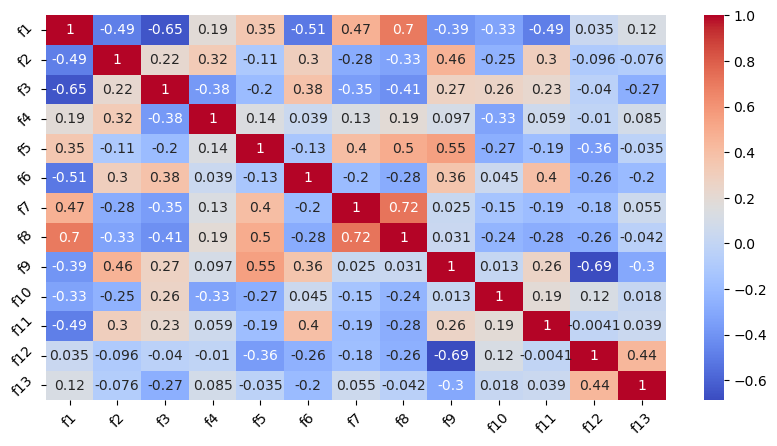

In [26]:
# Change feature label

# Define custom labels for the x and y-axis
x_axis_labels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']  # replace with your labels
y_axis_labels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']  # replace with your labels

plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size as needed
ax = sns.heatmap(corr_data_2_unscaled, annot=True, cmap='coolwarm')

# Set the custom labels
ax.set_xticklabels(x_axis_labels)
ax.set_yticklabels(y_axis_labels)

# Optional: rotate the labels if they overlap
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [27]:
# 2nd: Principal Component Analysis (PCA) using unscaled data

from sklearn.decomposition import PCA

pca_unscaled = PCA()

pca_X_train_unscaled = pca_unscaled.fit_transform(X_train_unscaled)
pca_X_test_unscaled = pca_unscaled.transform(X_test_unscaled)

print(pca_unscaled.explained_variance_ratio_)

[9.52116170e-01 4.20461196e-02 5.03072452e-03 4.66253146e-04
 2.98054540e-04 2.56860164e-05 6.04829005e-06 4.42300508e-06
 3.62977456e-06 2.68027001e-06 2.10709409e-07 1.22307717e-10]


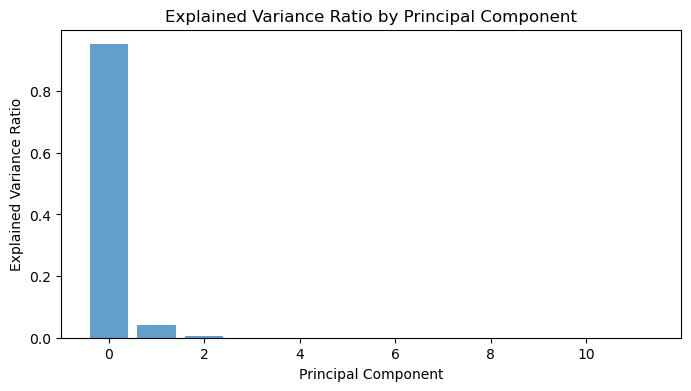

In [28]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(pca_unscaled.explained_variance_ratio_)), pca_unscaled.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [29]:
# 3rd: Principal Component Analysis (PCA) using scaled data

from sklearn.decomposition import PCA

pca_scaled = PCA()

pca_X_train_scaled = pca_scaled.fit_transform(X_train_scaled)
pca_X_test_scaled = pca_scaled.transform(X_test_scaled)

print(pca_scaled.explained_variance_ratio_)

[0.3159633  0.20956805 0.13098115 0.08281173 0.05988249 0.05140384
 0.04439884 0.0414812  0.02975875 0.02150805 0.01009788 0.00214472]


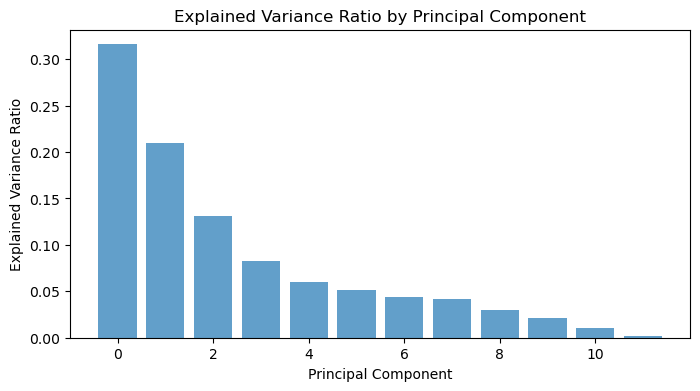

In [30]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(pca_scaled.explained_variance_ratio_)), pca_scaled.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [34]:
# Lets try fit the PCA'ed unscaled data into KNN Regressor (K=30)

knn_reg_PCA_unscaled = KNeighborsRegressor(n_neighbors=30)
knn_reg_PCA_unscaled.fit(pca_X_train_scaled, y_train_scaled)
print(knn_reg.score(pca_X_test_scaled, y_test_scaled))

-0.33456065399720347
